Each XLS or XLSX file contains a dataframe. <br>

Load each XLS or XLSX file in your Jupyter notebook. ​

For each dataframe, address missing values by taking the following steps:​

Count the number of missing values in the dataframe; count the number of missing values per column​<br>
Plot the distribution of data points using a histogram​<br>
Create a lag plot (a lag plot shows t versus t+1)​<br>
Based on the lag plot, state in a markdown cell whether the order of this data matters. ​<br>
Do one of the following (not both):​<br>
If the order of the data matters, then interpolate the missing values​<br>
If the order of the data does not matter, fill in the missing data by sampling from the distribution​<br>
Create a scatter plot using the columns in dataframe; no Nan entries should be present​<br>
Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.​<br>

Perform interpolation or sampling programmatically using Python (not manually)​ ​ ​

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

#### Reading the Excel

In [2]:
file1=pd.read_excel("imputation_homework_04.xls")
file2=pd.read_excel("imputation_homework_29.xlsx")
file3=pd.read_excel("imputation_homework_91.xlsx")

#### Checking the head of each column

In [3]:
file1.head()

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655


In [4]:
file2.head()

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00


In [5]:
file3.head()

,Unnamed: 0,date,value
0,0,2015-11-03,30.001248
1,1,2015-11-04,4.655104
2,2,2015-11-05,15.621201
3,3,2015-11-06,22.982759
4,4,2015-11-07,39.994644


#### Checking NA value for each column

In [6]:
file1dateNA=file1['time'].isna().sum()
print('file1dateNA:',file1dateNA)
file1ValueNA=file1['value'].isna().sum()
print('file1ValueNA:',file1ValueNA)
file2xNA=file2['x'].isna().sum()
print('file2xNA:',file2xNA)
file2yNA=file2['y'].isna().sum()
print('file2yNA:',file2yNA)
file3Date=file3['date'].isna().sum()
print('file3Date:',file3Date)
file3value=file3['value'].isna().sum()
print('file3value:',file3value)

file1dateNA: 0
file1ValueNA: 50
file2xNA: 9
file2yNA: 0
file3Date: 0
file3value: 84


#### Plotting histogram for the columns having NA value

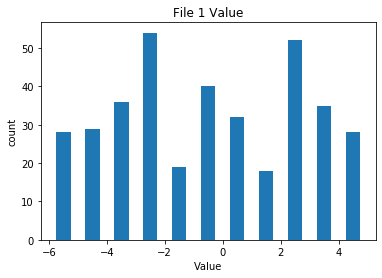

In [7]:
plt.hist(file1['value'], bins=range(int(file1['value'].min()),int(file1['value'].max())), rwidth=.5)
plt.title('File 1 Value')
plt.xlabel('Value')
plt.ylabel('count')
plt.show()

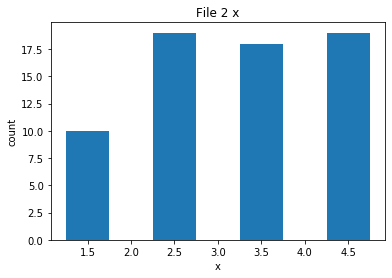

In [8]:
plt.hist(file2['x'], bins=range(int(file2['x'].min()),int(file2['x'].max())), rwidth=.5)
plt.title('File 2 x')
plt.xlabel('x')
plt.ylabel('count')
plt.show()

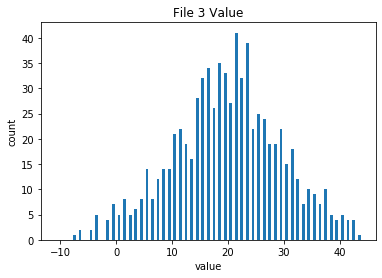

In [9]:
plt.hist(file3['value'], bins=range(int(file3['value'].min()),int(file3['value'].max())), rwidth=.5)
plt.title('File 3 Value')
plt.xlabel('value')
plt.ylabel('count')
plt.show()

#### Plotting Lag Plot for the columns having NA value

#### Order matters for file1 value

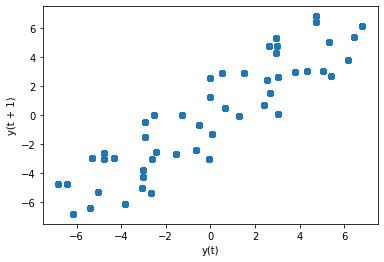

In [10]:
pd.plotting.lag_plot(file1['value']);

#### Order matters for the file, x

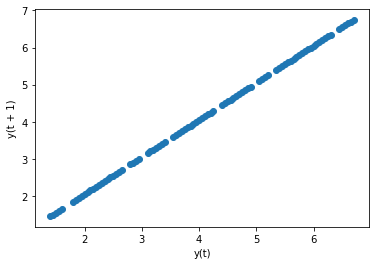

In [11]:
pd.plotting.lag_plot(file2['x']);

#### Order Does not matter for file3, value

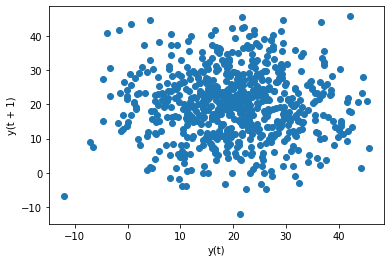

In [12]:
pd.plotting.lag_plot(file3['value']);

#### Interpolating the file1 and file2 columns as order matters for them <br>
#### And  plotting their lag plot

In [13]:
file1=file1.interpolate()

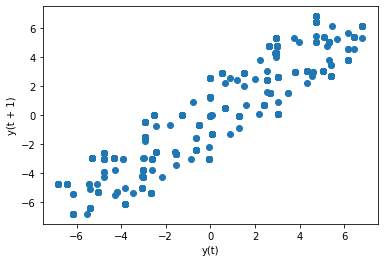

In [14]:
pd.plotting.lag_plot(file1['value']);

In [15]:
file2=file2.interpolate()

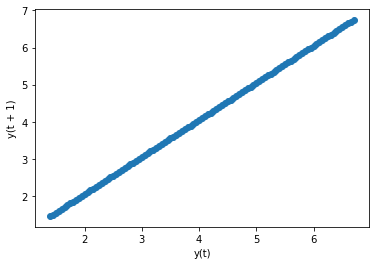

In [16]:
pd.plotting.lag_plot(file2['x']);

#### For sampling in the file3, we took random non NA vlaues from the 'value' column and assigned them to the NA values of the column.

In [17]:
nonNAValueInFile3=[]
for i in file3['value']:
    if pd.notna(i):
        nonNAValueInFile3.append(i)

In [18]:
for i, row in file3.iterrows():
    if pd.isna(row.value):
        randomValue=random.choice(nonNAValueInFile3)
        file3.at[i,'value'] = randomValue

#### Checking for NA vlaues in file3,value

In [19]:
NAinFile3=file3['value'].isna().sum()
print('NAinFile3:',NAinFile3)

NAinFile3: 0


#### Lag plot of file3 value after sampling

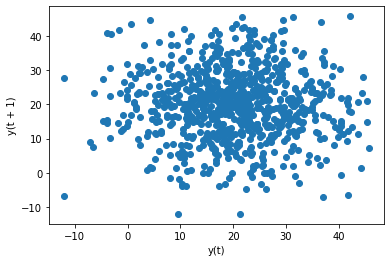

In [20]:
pd.plotting.lag_plot(file3['value']);

#### Plotting the Scatter plot for each file

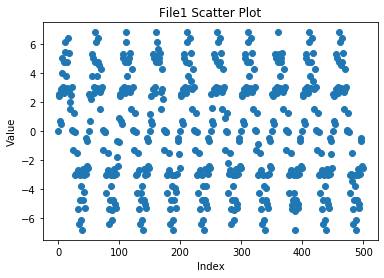

In [21]:
plt.scatter(file1.index, file1['value'])
plt.title('File1 Scatter Plot')
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()

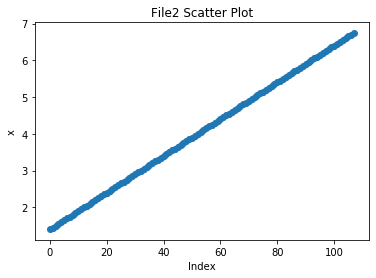

In [22]:
plt.scatter(file2.index, file2['x'])
plt.title('File2 Scatter Plot')
plt.ylabel('x')
plt.xlabel('Index')
plt.show()

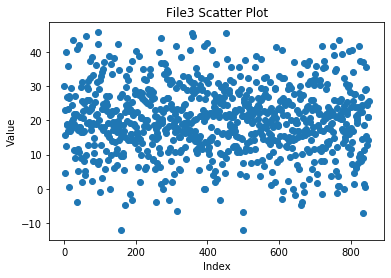

In [23]:
plt.scatter(file3.index, file3['value'])
plt.title('File3 Scatter Plot')
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()